In [2]:
# Data processing
import numpy as np
import pandas as pd
import geopandas as gpd

# Visualisation
import matplotlib
from ipyleaflet import Map, GeoData, basemaps, LayersControl
import seaborn
import folium
import mapclassify

In [3]:
supermarkets = pd.read_csv('Data Sources/Teyang_Lau_data/supermarket_coordinates.csv')
supermarkets.head()

,Unnamed: 0,ADDRESS,BLK_NO,BUILDING,LATITUDE,LONGITUDE,LONGTITUDE,POSTAL,ROAD_NAME,SEARCHVAL,X,Y,address
0,0,112 EAST COAST ROAD GOLDEN VILLAGE (GV KATONG)...,112,GOLDEN VILLAGE (GV KATONG),1.305225,103.905102,103.905102,428802,EAST COAST ROAD,GOLDEN VILLAGE (GV KATONG),35988.82245,31950.73860,428802
1,1,112 EAST COAST ROAD 112 KATONG SINGAPORE 428802,112,112 KATONG,1.305087,103.905099,103.905099,428802,EAST COAST ROAD,112 KATONG,35988.49359,31935.50163,428802
2,2,112 EAST COAST ROAD DBS 112 KATONG SINGAPORE 4...,112,DBS 112 KATONG,1.305158,103.905067,103.905067,428802,EAST COAST ROAD,DBS 112 KATONG,35984.93090,31943.41871,428802
3,3,112 EAST COAST ROAD UOB I12 KATONG AUTOLOBBY S...,112,UOB I12 KATONG AUTOLOBBY,1.305223,103.905044,103.905044,428802,EAST COAST ROAD,UOB I12 KATONG AUTOLOBBY,35982.37371,31950.56659,428802
4,0,78A TELOK BLANGAH STREET 32 MULTI STOREY CAR P...,78A,MULTI STOREY CAR PARK,1.273388,103.808981,103.808981,101078,TELOK BLANGAH STREET 32,MULTI STOREY CAR PARK,25291.36793,28430.25516,101078


In [4]:
supermarkets_gdf = gpd.GeoDataFrame(
    supermarkets, geometry=gpd.points_from_xy(supermarkets.X, supermarkets.Y), crs='EPSG:3414'
)
supermarkets_gdf.head()

,Unnamed: 0,ADDRESS,BLK_NO,BUILDING,LATITUDE,LONGITUDE,LONGTITUDE,POSTAL,ROAD_NAME,SEARCHVAL,X,Y,address,geometry
0,0,112 EAST COAST ROAD GOLDEN VILLAGE (GV KATONG)...,112,GOLDEN VILLAGE (GV KATONG),1.305225,103.905102,103.905102,428802,EAST COAST ROAD,GOLDEN VILLAGE (GV KATONG),35988.82245,31950.73860,428802,POINT (35988.822 31950.739)
1,1,112 EAST COAST ROAD 112 KATONG SINGAPORE 428802,112,112 KATONG,1.305087,103.905099,103.905099,428802,EAST COAST ROAD,112 KATONG,35988.49359,31935.50163,428802,POINT (35988.494 31935.502)
2,2,112 EAST COAST ROAD DBS 112 KATONG SINGAPORE 4...,112,DBS 112 KATONG,1.305158,103.905067,103.905067,428802,EAST COAST ROAD,DBS 112 KATONG,35984.93090,31943.41871,428802,POINT (35984.931 31943.419)
3,3,112 EAST COAST ROAD UOB I12 KATONG AUTOLOBBY S...,112,UOB I12 KATONG AUTOLOBBY,1.305223,103.905044,103.905044,428802,EAST COAST ROAD,UOB I12 KATONG AUTOLOBBY,35982.37371,31950.56659,428802,POINT (35982.374 31950.567)
4,0,78A TELOK BLANGAH STREET 32 MULTI STOREY CAR P...,78A,MULTI STOREY CAR PARK,1.273388,103.808981,103.808981,101078,TELOK BLANGAH STREET 32,MULTI STOREY CAR PARK,25291.36793,28430.25516,101078,POINT (25291.368 28430.255)


<AxesSubplot:>

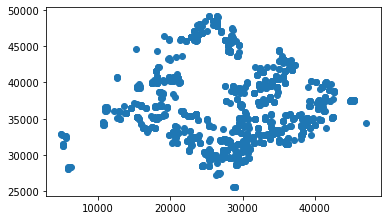

In [5]:
supermarkets_gdf.plot()

In [6]:
supermarkets_gdf.to_file('Generated Files/supermarkets_EPSG3414.shp')

In [7]:
supermarkets_names = pd.read_csv('Data Sources/TL_whole_data/list-of-supermarket-licences.csv')
supermarkets_names.head()

,licence_num,licensee_name,building_name,block_house_num,level_num,unit_num,street_name,postal_code
0,S02185J000,COLD STORAGE SINGAPORE (1983) PTE LTD,na,982,1,1,BUANGKOK CRESCENT,530982
1,S97166P000,COLD STORAGE SINGAPORE (1983) PTE LTD,HOUGANG GREEN SHOPPING MALL,21,1,52,HOUGANG STREET 51,538719
2,CE15B61K000,U STARS SUPERMARKET PTE. LTD.,na,330,1,1,ANCHORVALE STREET,540330
3,S02029J000,NTUC Fairprice Co-operative Ltd,HOUGANG POINT,1,2,1,HOUGANG STREET 91,538692
4,CE04561V000,SHENG SIONG SUPERMARKET PTE LTD,na,19,1,42401,SERANGOON NORTH AVENUE 5,554913


In [8]:
supermarket_names = supermarkets_names.drop_duplicates(subset='licence_num')
supermarket_names.head()

,licence_num,licensee_name,building_name,block_house_num,level_num,unit_num,street_name,postal_code
0,S02185J000,COLD STORAGE SINGAPORE (1983) PTE LTD,na,982,1,1,BUANGKOK CRESCENT,530982
1,S97166P000,COLD STORAGE SINGAPORE (1983) PTE LTD,HOUGANG GREEN SHOPPING MALL,21,1,52,HOUGANG STREET 51,538719
2,CE15B61K000,U STARS SUPERMARKET PTE. LTD.,na,330,1,1,ANCHORVALE STREET,540330
3,S02029J000,NTUC Fairprice Co-operative Ltd,HOUGANG POINT,1,2,1,HOUGANG STREET 91,538692
4,CE04561V000,SHENG SIONG SUPERMARKET PTE LTD,na,19,1,42401,SERANGOON NORTH AVENUE 5,554913


In [10]:
buildings = gpd.read_file('Generated Files/buildings_EPSG3414_no-dups.shp')
buildings.head()

,ADDRESS,BLK_NO,BUILDING,LATITUDE,LONGITUDE,LONGTITUDE,POSTAL,ROAD_NAME,SEARCHVAL,X,Y,geometry
0,1 STRAITS BOULEVARD SINGAPORE CHINESE CULTURAL...,1,SINGAPORE CHINESE CULTURAL CENTRE,1.275805,103.849615,103.849615,018906,STRAITS BOULEVARD,SINGAPORE CHINESE CULTURAL CENTRE,29813.663491,28697.520756,POINT (29813.663 28697.521)
1,11A STRAITS BOULEVARD TEMPORARY SITE OFFICE SI...,11A,TEMPORARY SITE OFFICE,1.274950,103.851665,103.851665,018907,STRAITS BOULEVARD,TEMPORARY SITE OFFICE,30041.838898,28602.987244,POINT (30041.839 28602.987)
2,5A MARINA GARDENS DRIVE SINGAPORE 018910,5A,NIL,1.279587,103.868956,103.868956,018910,MARINA GARDENS DRIVE,5A MARINA GARDENS DRIVE SINGAPORE 018910,31966.120787,29115.753373,POINT (31966.121 29115.753)
3,2 CENTRAL BOULEVARD CENTRAL BOULEVARD TOWERS S...,2,CENTRAL BOULEVARD TOWERS,1.279744,103.851591,103.851591,018916,CENTRAL BOULEVARD,CENTRAL BOULEVARD TOWERS,30033.604463,29133.104676,POINT (30033.604 29133.105)
4,21 PARK STREET DBS MARINA BAY MRT STATION SING...,21,DBS MARINA BAY MRT STATION,1.276427,103.854598,103.854598,018925,PARK STREET,DBS MARINA BAY MRT STATION,30368.205612,28766.381902,POINT (30368.206 28766.382)


In [137]:
supermarkets_names['X'] = 0.0
supermarkets_names['Y'] = 0.0

supermarkets_names.head()

,licence_num,licensee_name,building_name,block_house_num,level_num,unit_num,street_name,postal_code,X,Y
0,S02185J000,COLD STORAGE SINGAPORE (1983) PTE LTD,na,982,1,1,BUANGKOK CRESCENT,530982,0.0,0.0
1,S97166P000,COLD STORAGE SINGAPORE (1983) PTE LTD,HOUGANG GREEN SHOPPING MALL,21,1,52,HOUGANG STREET 51,538719,0.0,0.0
2,CE15B61K000,U STARS SUPERMARKET PTE. LTD.,na,330,1,1,ANCHORVALE STREET,540330,0.0,0.0
3,S02029J000,NTUC Fairprice Co-operative Ltd,HOUGANG POINT,1,2,1,HOUGANG STREET 91,538692,0.0,0.0
4,CE04561V000,SHENG SIONG SUPERMARKET PTE LTD,na,19,1,42401,SERANGOON NORTH AVENUE 5,554913,0.0,0.0


In [139]:
def match_postal_code(df):
    for r in range(len(df)):
        if buildings['POSTAL'].str.contains(supermarkets_names['postal_code'].iat[r]).any():
            df.at[r, 'X'] = buildings['X'].iat[buildings[buildings['POSTAL']==supermarkets_names['postal_code'].iat[r]].index.values[0]]
            df.at[r, 'Y'] = buildings['Y'].iat[buildings[buildings['POSTAL']==supermarkets_names['postal_code'].iat[r]].index.values[0]]
    return df

In [140]:
supermarkets_matched = match_postal_code(supermarkets_names)
supermarkets_matched.head()


,licence_num,licensee_name,building_name,block_house_num,level_num,unit_num,street_name,postal_code,X,Y
0,S02185J000,COLD STORAGE SINGAPORE (1983) PTE LTD,na,982,1,1,BUANGKOK CRESCENT,530982,33118.164530,40312.981548
1,S97166P000,COLD STORAGE SINGAPORE (1983) PTE LTD,HOUGANG GREEN SHOPPING MALL,21,1,52,HOUGANG STREET 51,538719,34068.339890,40143.543312
2,CE15B61K000,U STARS SUPERMARKET PTE. LTD.,na,330,1,1,ANCHORVALE STREET,540330,34224.059434,42082.143501
3,S02029J000,NTUC Fairprice Co-operative Ltd,HOUGANG POINT,1,2,1,HOUGANG STREET 91,538692,33133.884601,39739.863996
4,CE04561V000,SHENG SIONG SUPERMARKET PTE LTD,na,19,1,42401,SERANGOON NORTH AVENUE 5,554913,32304.365203,39736.279691


In [141]:
supermarkets_matched_gdf = gpd.GeoDataFrame(
    supermarkets_matched, geometry=gpd.points_from_xy(supermarkets_matched.X, supermarkets_matched.Y), crs='EPSG:3414'
)
supermarkets_matched_gdf.head()

,licence_num,licensee_name,building_name,block_house_num,level_num,unit_num,street_name,postal_code,X,Y,geometry
0,S02185J000,COLD STORAGE SINGAPORE (1983) PTE LTD,na,982,1,1,BUANGKOK CRESCENT,530982,33118.164530,40312.981548,POINT (33118.165 40312.982)
1,S97166P000,COLD STORAGE SINGAPORE (1983) PTE LTD,HOUGANG GREEN SHOPPING MALL,21,1,52,HOUGANG STREET 51,538719,34068.339890,40143.543312,POINT (34068.340 40143.543)
2,CE15B61K000,U STARS SUPERMARKET PTE. LTD.,na,330,1,1,ANCHORVALE STREET,540330,34224.059434,42082.143501,POINT (34224.059 42082.144)
3,S02029J000,NTUC Fairprice Co-operative Ltd,HOUGANG POINT,1,2,1,HOUGANG STREET 91,538692,33133.884601,39739.863996,POINT (33133.885 39739.864)
4,CE04561V000,SHENG SIONG SUPERMARKET PTE LTD,na,19,1,42401,SERANGOON NORTH AVENUE 5,554913,32304.365203,39736.279691,POINT (32304.365 39736.280)


In [142]:
supermarkets_matched_gdf.to_file('Generated Files/supermarkets_matched_EPSG3414.shp')

<ipython-input-142-9b751dbdc284>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  supermarkets_matched_gdf.to_file('Generated Files/supermarkets_matched_EPSG3414.shp')


<AxesSubplot:>

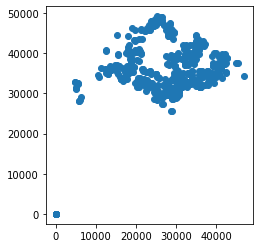

In [144]:
supermarkets_matched_gdf.plot()

In [145]:
supermarkets_matched_gdf[supermarkets_matched_gdf['X']==0]

,licence_num,licensee_name,building_name,block_house_num,level_num,unit_num,street_name,postal_code,X,Y,geometry
94,W02091K000,NTUC Fairprice Co-operative Ltd,ROCHOR CENTRE,1,1,640,ROCHOR ROAD,180001,0.0,0.0,POINT (0.000 0.000)
118,CE07863X000,I-TEC SUPERMART PTE LTD,na,371,na,0,SERANGOON ROAD,218120,0.0,0.0,POINT (0.000 0.000)
185,NE04155C000,YES SUPERMARKET PTE LTD,na,na,na,0,na,0na,0.0,0.0,POINT (0.000 0.000)
238,B02040E000,SHENG SIONG SUPERMARKET PTE LTD,na,6A,1,280,WOODLANDS CENTRE ROAD,731006,0.0,0.0,POINT (0.000 0.000)
241,NW14561E000,7SEVEN PTE. LTD.,na,300,1,3,ADMIRALTY ROAD WEST,757027,0.0,0.0,POINT (0.000 0.000)
339,NE10228C000,KPM MINI MART PTE LTD,SCAL DORMITORY (HOUGANG ),200,1,3,HOUGANG AVENUE 3,538848,0.0,0.0,POINT (0.000 0.000)
347,E02044L000,SIM CHIANG LEE,na,443,na,0,TANJONG KATONG ROAD,437150,0.0,0.0,POINT (0.000 0.000)
365,SE11505P000,COLD STORAGE SINGAPORE (1983) PTE LTD,na,291,1,1,JOO CHIAT ROAD,427540,0.0,0.0,POINT (0.000 0.000)
446,SW08379J000,WONS BUTCHERY PTE. LTD.,GOH & GOH BUILDING,122,na,0,UPPER BUKIT TIMAH ROAD,588175,0.0,0.0,POINT (0.000 0.000)
451,SW13126K000,BALU MINIMART PTE. LTD,"JURONG LODGE ONE , BLK A",501A,na,0,JURONG ROAD,649698,0.0,0.0,POINT (0.000 0.000)
